Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, KFold
from pycaret.regression import *
from pycaret.datasets import get_data

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings


<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

Loding dataset

In [ ]:
cov19=pd.read_csv("/content/country_vaccinations.csv")

EDA

In [ ]:
cov19.describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        4.360700e+04       4.129400e+04             3.880200e+04   
mean         4.592964e+07       1.770508e+07             1.413830e+07   
std          2.246004e+08       7.078731e+07             5.713920e+07   
min          0.000000e+00       0.000000e+00             1.000000e+00   
25%          5.264100e+05       3.494642e+05             2.439622e+05   
50%          3.590096e+06       2.187310e+06             1.722140e+06   
75%          1.701230e+07       9.152520e+06             7.559870e+06   
max          3.263129e+09       1.275541e+09             1.240777e+09   

       daily_vaccinations_raw  daily_vaccinations  \
count            3.536200e+04        8.621300e+04   
mean             2.705996e+05        1.313055e+05   
std              1.212427e+06        7.682388e+05   
min              0.000000e+00        0.000000e+00   
25%              4.668000e+03        9.000000e+02   
50%              2.530900e+04        7.343000e+03   
75%              1.234925e+05        4.409800e+04   
max              2.474100e+07        2.242429e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    43607.000000                   41294.000000   
mean                        80.188543                      40.927317   
std                         67.913577                      29.290759   
min                          0.000000                       0.000000   
25%                         16.050000                      11.370000   
50%                         67.520000                      41.435000   
75%                        132.735000                      67.910000   
max                        345.370000                     124.760000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
count                         38802.000000                    86213.000000  
mean                             35.523243                     3257.049157  
std                              28.376252                     3934.312440  
min                               0.000000                        0.000000  
25%                               7.020000                      636.000000  
50%                              31.750000                     2050.000000  
75%                              62.080000                     4682.000000  
max                             122.370000                   117497.000000

In [ ]:
cov19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

Data Preprocessing

In [ ]:
cov19.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
cov19_fillna= cov19

In [ ]:
cov19_fillna.fillna(cov19_fillna.mean(), inplace=True)
# count the number of NaN values in each column
print(cov19_fillna.isnull().sum())

cov19_fillna

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64


<ipython-input-20-9e428849e60a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov19_fillna.fillna(cov19_fillna.mean(), inplace=True)


country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22        0.000000e+00   
1      Afghanistan      AFG  2021-02-23        4.592964e+07   
2      Afghanistan      AFG  2021-02-24        4.592964e+07   
3      Afghanistan      AFG  2021-02-25        4.592964e+07   
4      Afghanistan      AFG  2021-02-26        4.592964e+07   
...            ...      ...         ...                 ...   
86507     Zimbabwe      ZWE  2022-03-25        8.691642e+06   
86508     Zimbabwe      ZWE  2022-03-26        8.791728e+06   
86509     Zimbabwe      ZWE  2022-03-27        8.845039e+06   
86510     Zimbabwe      ZWE  2022-03-28        8.934360e+06   
86511     Zimbabwe      ZWE  2022-03-29        9.039729e+06   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0           0.000000e+00             1.413830e+07           270599.578248   
1           1.770508e+07             1.413830e+07           270599.578248   
2           1.770508e+07             1.413830e+07           270599.578248   
3           1.770508e+07             1.413830e+07           270599.578248   
4           1.770508e+07             1.413830e+07           270599.578248   
...                  ...                      ...                     ...   
86507       4.814582e+06             3.473523e+06           139213.000000   
86508       4.886242e+06             3.487962e+06           100086.000000   
86509       4.918147e+06             3.493763e+06            53311.000000   
86510       4.975433e+06             3.501493e+06            89321.000000   
86511       5.053114e+06             3.510256e+06           105369.000000   

       daily_vaccinations  total_vaccinations_per_hundred  \
0           131305.486075                        0.000000   
1             1367.000000                       80.188543   
2             1367.000000                       80.188543   
3             1367.000000                       80.188543   
4             1367.000000                       80.188543   
...                   ...                             ...   
86507        69579.000000                       57.590000   
86508        83429.000000                       58.250000   
86509        90629.000000                       58.610000   
86510       100614.000000                       59.200000   
86511       103751.000000                       59.900000   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                           0.000000                            35.523243   
1                          40.927317                            35.523243   
2                          40.927317                            35.523243   
3                          40.927317                            35.523243   
4                          40.927317                            35.523243   
...                              ...                                  ...   
86507                      31.900000                            23.020000   
86508                      32.380000                            23.110000   
86509                      32.590000                            23.150000   
86510                      32.970000                            23.200000   
86511                      33.480000                            23.260000   

       daily_vaccinations_per_million  \
0                         3257.049157   
1                           34.000000   
2                           34.000000   
3                           34.000000   
4                           34.000000   
...                               ...   
86507                     4610.000000   
86508                     5528.000000   
86509                     6005.000000   
86510                     6667.000000   
86511                     6874.000000   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  

In [ ]:
pip install scikit-learn


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cov19['country']=le.fit_transform(cov19['country'])
cov19

country iso_code        date  total_vaccinations  people_vaccinated  \
0            0      AFG  2021-02-22        0.000000e+00       0.000000e+00   
1            0      AFG  2021-02-23        4.592964e+07       1.770508e+07   
2            0      AFG  2021-02-24        4.592964e+07       1.770508e+07   
3            0      AFG  2021-02-25        4.592964e+07       1.770508e+07   
4            0      AFG  2021-02-26        4.592964e+07       1.770508e+07   
...        ...      ...         ...                 ...                ...   
86507      222      ZWE  2022-03-25        8.691642e+06       4.814582e+06   
86508      222      ZWE  2022-03-26        8.791728e+06       4.886242e+06   
86509      222      ZWE  2022-03-27        8.845039e+06       4.918147e+06   
86510      222      ZWE  2022-03-28        8.934360e+06       4.975433e+06   
86511      222      ZWE  2022-03-29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4      Johnson&Johnson, Oxford/

In [ ]:
le=LabelEncoder()
cov19["iso_code"]=le.fit_transform(cov19["iso_code"])
cov19

country  iso_code        date  total_vaccinations  people_vaccinated  \
0            0         1  2021-02-22        0.000000e+00       0.000000e+00   
1            0         1  2021-02-23        4.592964e+07       1.770508e+07   
2            0         1  2021-02-24        4.592964e+07       1.770508e+07   
3            0         1  2021-02-25        4.592964e+07       1.770508e+07   
4            0         1  2021-02-26        4.592964e+07       1.770508e+07   
...        ...       ...         ...                 ...                ...   
86507      222       222  2022-03-25        8.691642e+06       4.814582e+06   
86508      222       222  2022-03-26        8.791728e+06       4.886242e+06   
86509      222       222  2022-03-27        8.845039e+06       4.918147e+06   
86510      222       222  2022-03-28        8.934360e+06       4.975433e+06   
86511      222       222  2022-03-29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4      Johnson&John

In [ ]:
le=LabelEncoder()
cov19["vaccines"]=le.fit_transform(cov19["vaccines"])
cov19

country  iso_code        date  total_vaccinations  people_vaccinated  \
0            0         1  2021-02-22        0.000000e+00       0.000000e+00   
1            0         1  2021-02-23        4.592964e+07       1.770508e+07   
2            0         1  2021-02-24        4.592964e+07       1.770508e+07   
3            0         1  2021-02-25        4.592964e+07       1.770508e+07   
4            0         1  2021-02-26        4.592964e+07       1.770508e+07   
...        ...       ...         ...                 ...                ...   
86507      222       222  2022-03-25        8.691642e+06       4.814582e+06   
86508      222       222  2022-03-26        8.791728e+06       4.886242e+06   
86509      222       222  2022-03-27        8.845039e+06       4.918147e+06   
86510      222       222  2022-03-28        8.934360e+06       4.975433e+06   
86511      222       222  2022-03-29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

       vaccines                source_name  \
0            36  World Health Organization   
1            36  World Health Organization   
2            36  World Health Organization   
3            36  World Health Organization   
4            36  World Health Organization   
...         ...                        ... 

In [ ]:
le=LabelEncoder()
cov19['source_name']=le.fit_transform(cov19['source_name'])
cov19

country  iso_code        date  total_vaccinations  people_vaccinated  \
0            0         1  2021-02-22        0.000000e+00       0.000000e+00   
1            0         1  2021-02-23        4.592964e+07       1.770508e+07   
2            0         1  2021-02-24        4.592964e+07       1.770508e+07   
3            0         1  2021-02-25        4.592964e+07       1.770508e+07   
4            0         1  2021-02-26        4.592964e+07       1.770508e+07   
...        ...       ...         ...                 ...                ...   
86507      222       222  2022-03-25        8.691642e+06       4.814582e+06   
86508      222       222  2022-03-26        8.791728e+06       4.886242e+06   
86509      222       222  2022-03-27        8.845039e+06       4.918147e+06   
86510      222       222  2022-03-28        8.934360e+06       4.975433e+06   
86511      222       222  2022-03-29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

       vaccines  source_name  \
0            36           80   
1            36           80   
2            36           80   
3            36           80   
4            36           80   
...         ...          ...   
86507        72           48   
86508        72           48   
86509        72           48   

In [ ]:
le=LabelEncoder()
cov19["source_website"]=le.fit_transform(cov19["source_website"])
cov19

country  iso_code        date  total_vaccinations  people_vaccinated  \
0            0         1  2021-02-22        0.000000e+00       0.000000e+00   
1            0         1  2021-02-23        4.592964e+07       1.770508e+07   
2            0         1  2021-02-24        4.592964e+07       1.770508e+07   
3            0         1  2021-02-25        4.592964e+07       1.770508e+07   
4            0         1  2021-02-26        4.592964e+07       1.770508e+07   
...        ...       ...         ...                 ...                ...   
86507      222       222  2022-03-25        8.691642e+06       4.814582e+06   
86508      222       222  2022-03-26        8.791728e+06       4.886242e+06   
86509      222       222  2022-03-27        8.845039e+06       4.918147e+06   
86510      222       222  2022-03-28        8.934360e+06       4.975433e+06   
86511      222       222  2022-03-29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

       vaccines  source_name  source_website  souce_name  
0            36           80              21          80  
1            36           80              21          80  
2            36           80              21          80  
3            36           80              21          80  
4            36         

In [ ]:
cov19['date'] = cov19['date'].str.replace('-', ' ')
cov19

country  iso_code        date  total_vaccinations  people_vaccinated  \
0            0         1  2021 02 22        0.000000e+00       0.000000e+00   
1            0         1  2021 02 23        4.592964e+07       1.770508e+07   
2            0         1  2021 02 24        4.592964e+07       1.770508e+07   
3            0         1  2021 02 25        4.592964e+07       1.770508e+07   
4            0         1  2021 02 26        4.592964e+07       1.770508e+07   
...        ...       ...         ...                 ...                ...   
86507      222       222  2022 03 25        8.691642e+06       4.814582e+06   
86508      222       222  2022 03 26        8.791728e+06       4.886242e+06   
86509      222       222  2022 03 27        8.845039e+06       4.918147e+06   
86510      222       222  2022 03 28        8.934360e+06       4.975433e+06   
86511      222       222  2022 03 29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

       vaccines  source_name  source_website  souce_name  
0            36           80              21          80  
1            36           80              21          80  
2            36           80              21          80  
3            36           80              21          80  
4            36         

In [ ]:
cov19.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website', 'souce_name'],
      dtype='object')

Stroytelling-Visualization

<ipython-input-36-3a1ba776186c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cov19.corr()


<AxesSubplot: >

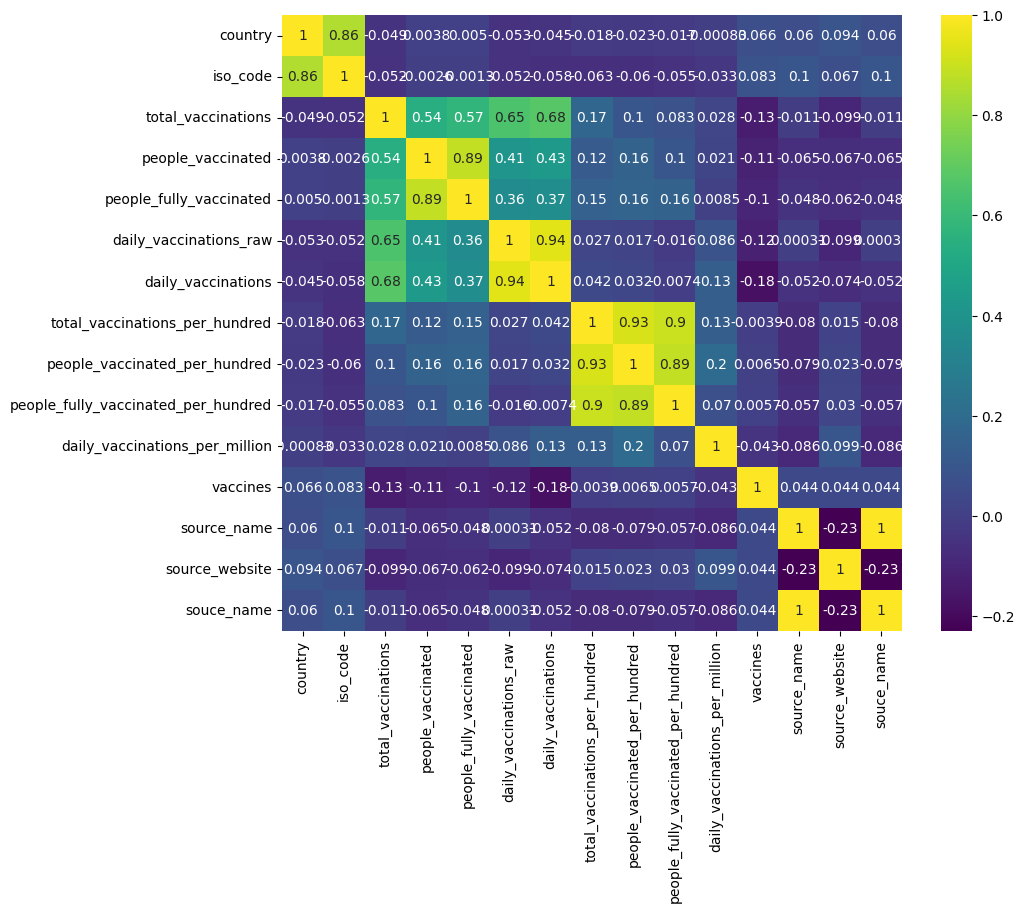

In [ ]:
corr = cov19.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap="viridis",annot=True)

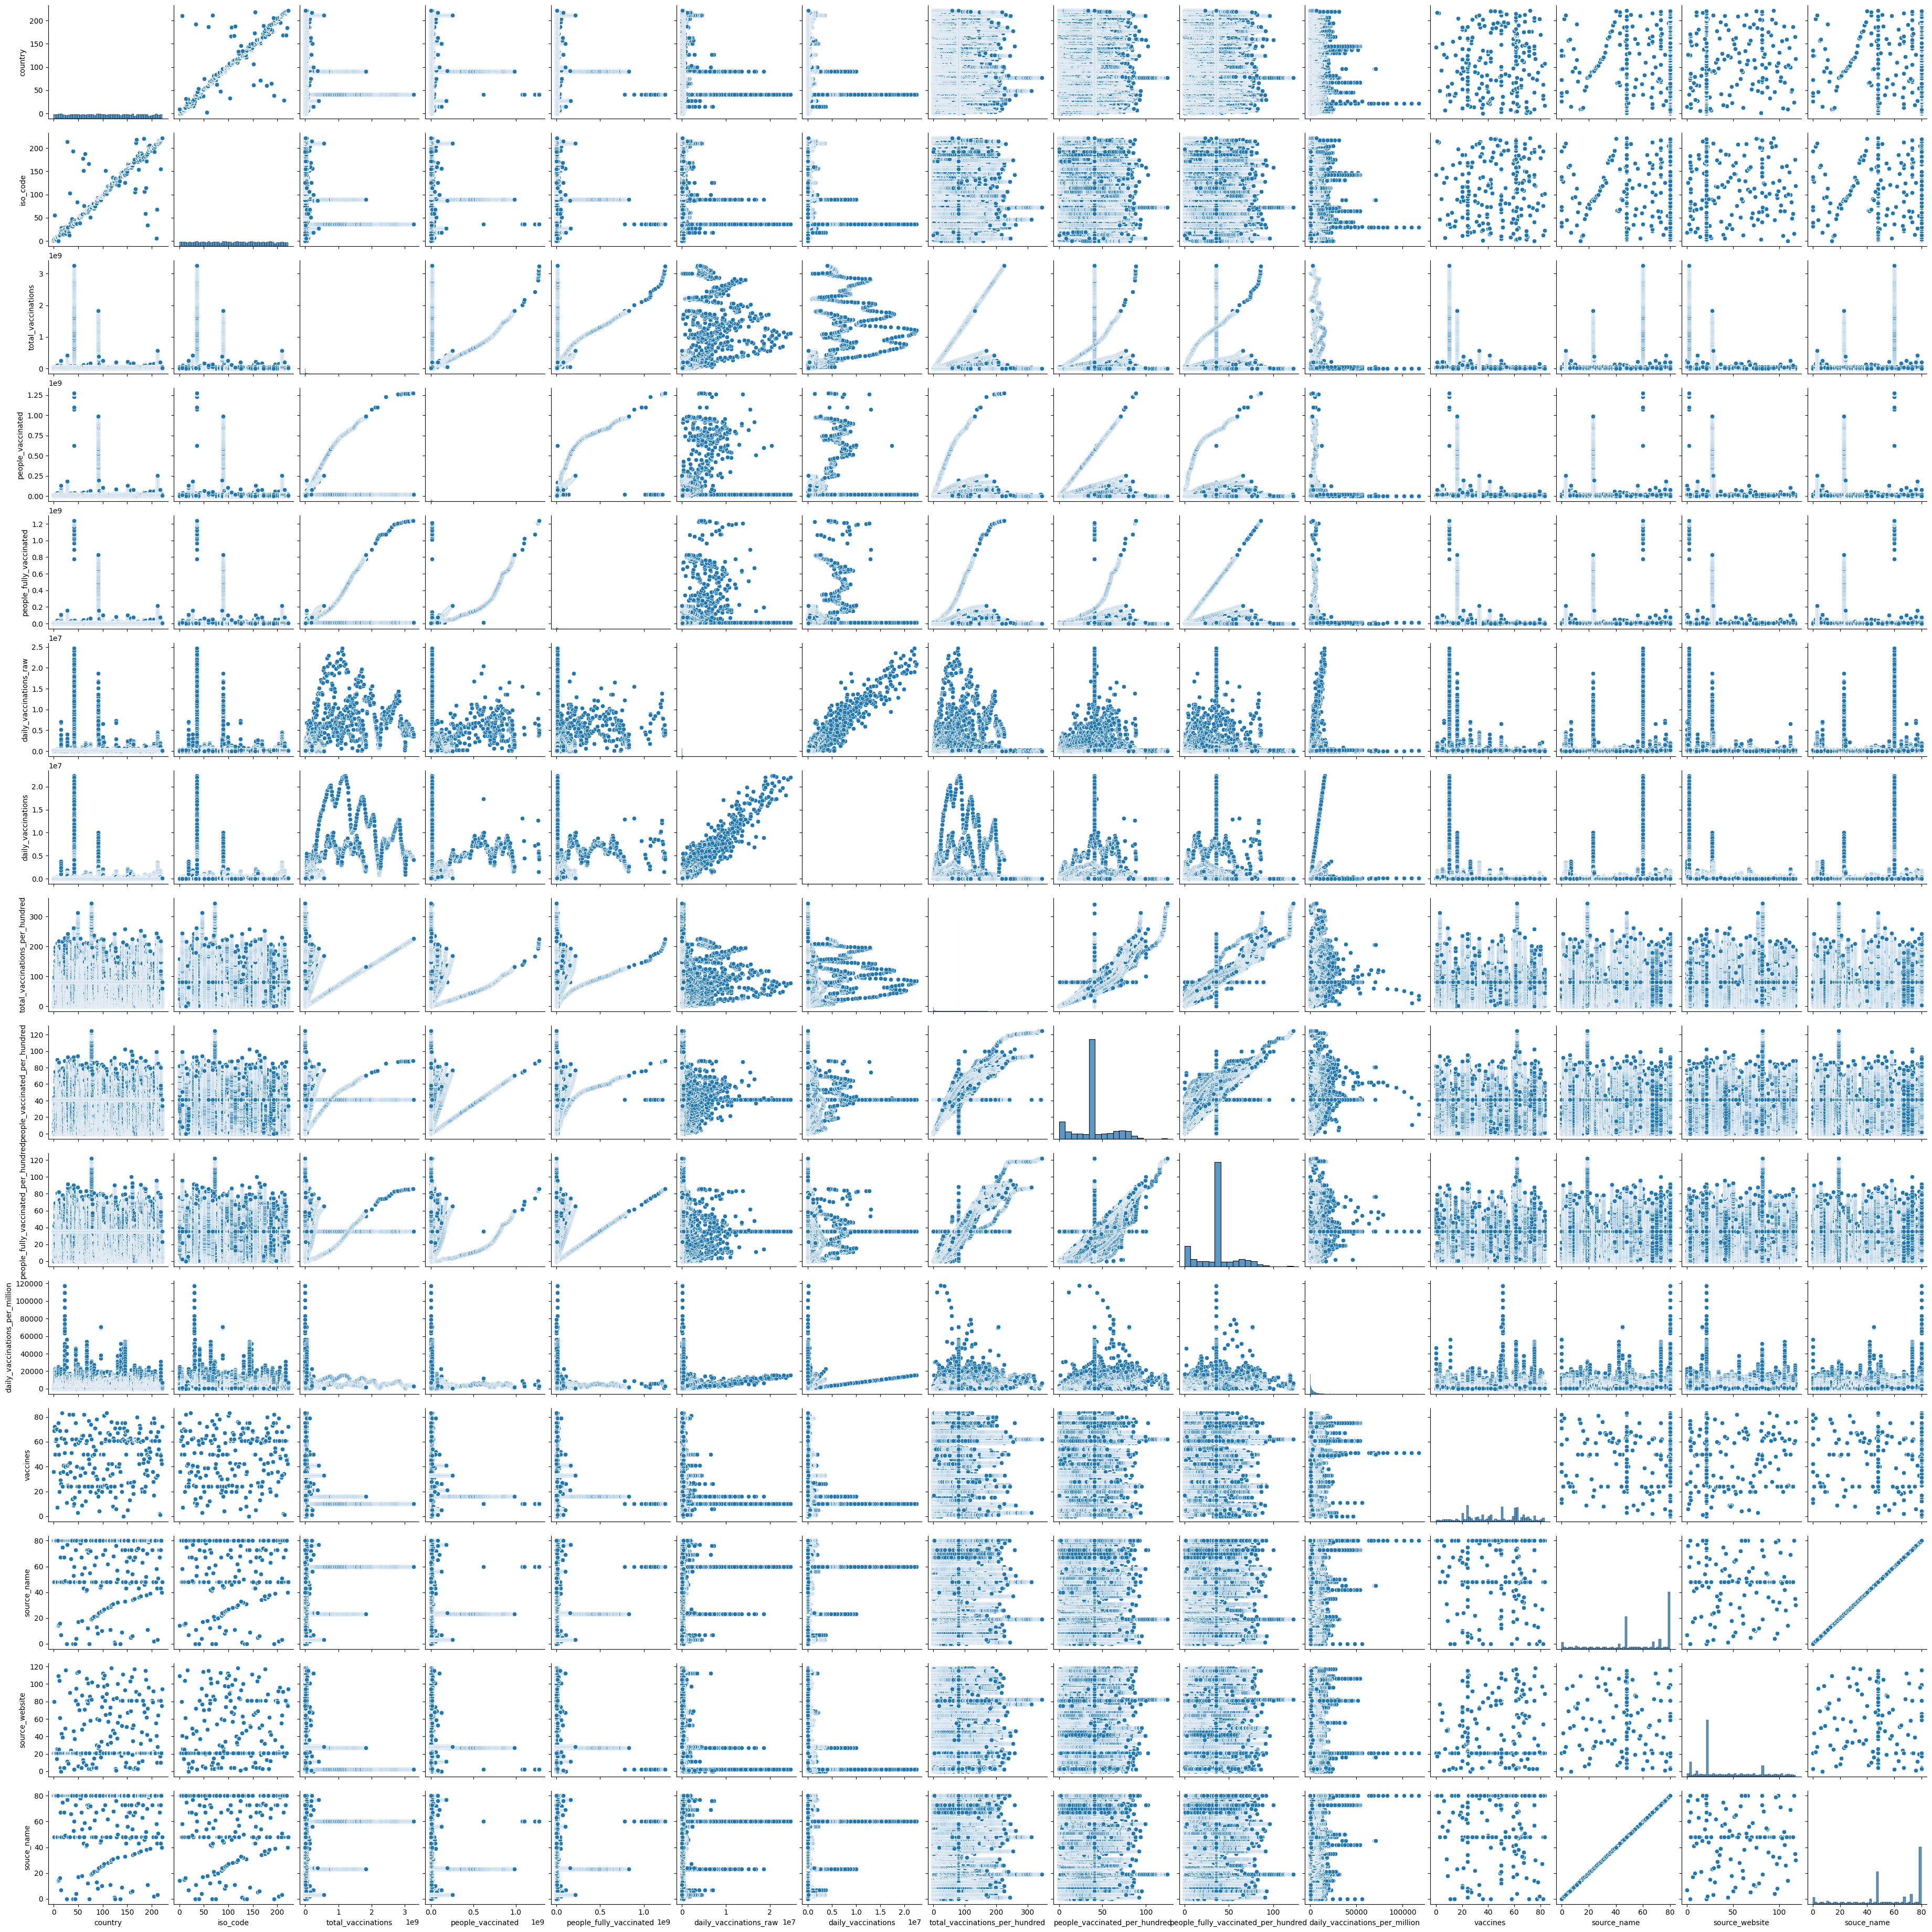

In [ ]:
sns.pairplot(cov19)

Preparing Data for Machine lerning

<AxesSubplot: xlabel='total_vaccinations', ylabel='daily_vaccinations'>

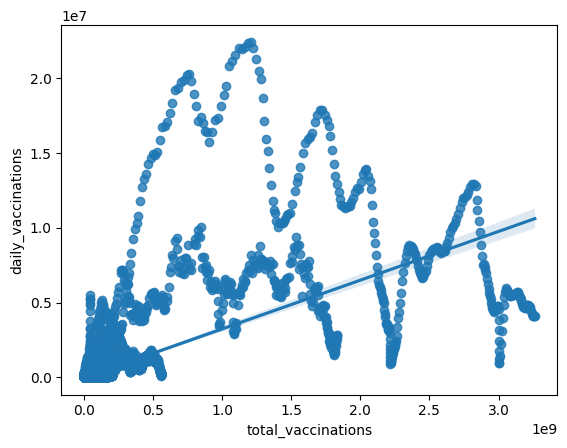

In [ ]:
sns.regplot( y="daily_vaccinations",x="total_vaccinations",  data=cov19)

<AxesSubplot: xlabel='total_vaccinations', ylabel='daily_vaccinations_raw'>

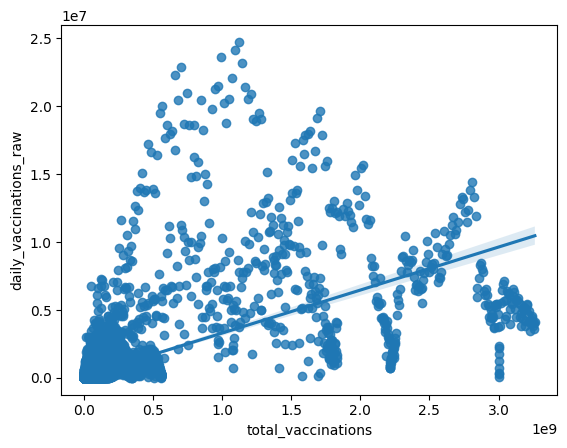

In [ ]:
sns.regplot(y="daily_vaccinations_raw",x='total_vaccinations',data=cov19)


**Train Your model**

<AxesSubplot: xlabel='total_vaccinations', ylabel='people_fully_vaccinated'>

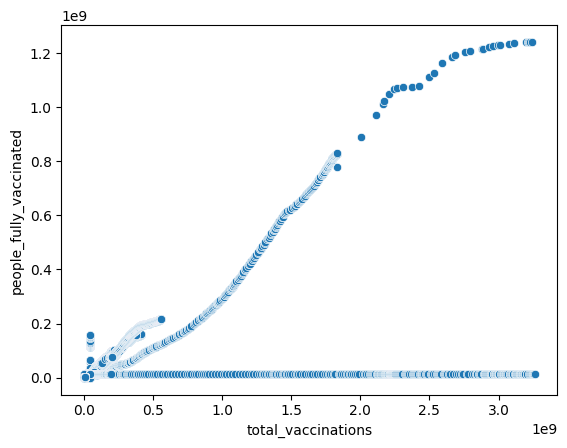

In [ ]:
sns.scatterplot(y="people_fully_vaccinated",x="total_vaccinations",data=cov19)

<AxesSubplot: xlabel='total_vaccinations', ylabel='people_vaccinated'>

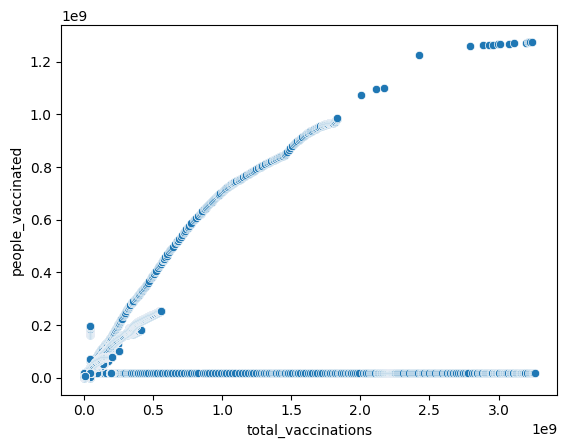

In [ ]:
sns.scatterplot(y="people_vaccinated",x="total_vaccinations",data=cov19)

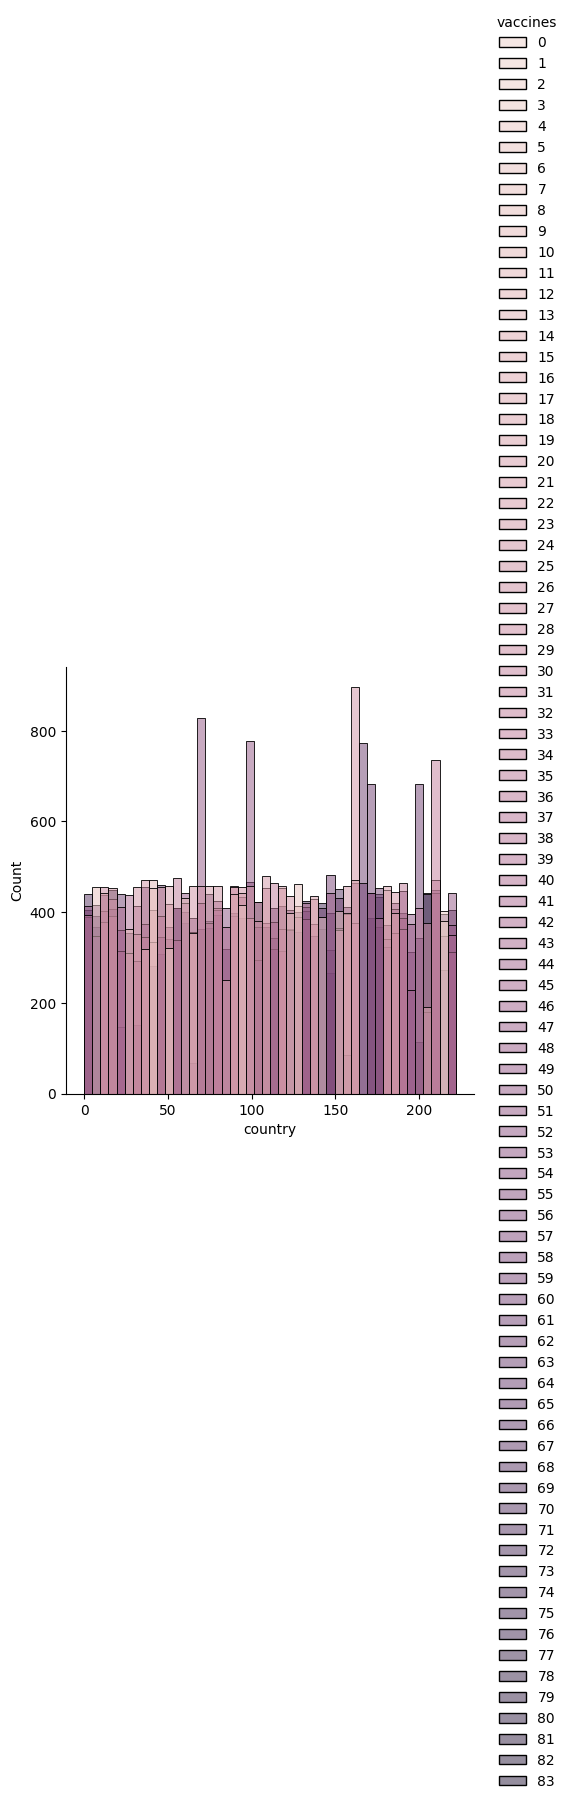

In [ ]:
sns.displot(cov19, x="country", hue="vaccines",  common_norm=False)

<AxesSubplot: xlabel='vaccines', ylabel='country'>

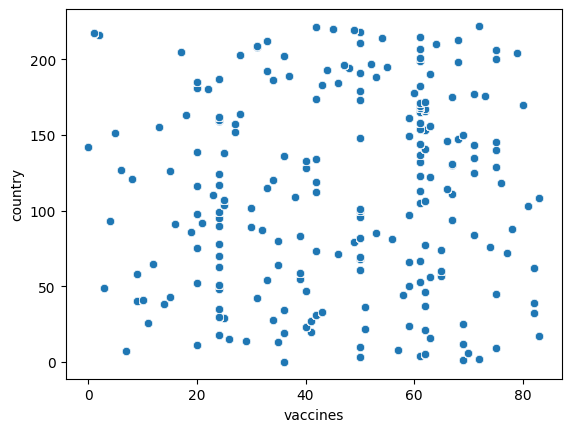

In [ ]:
sns.scatterplot(cov19,x="vaccines",y='country')

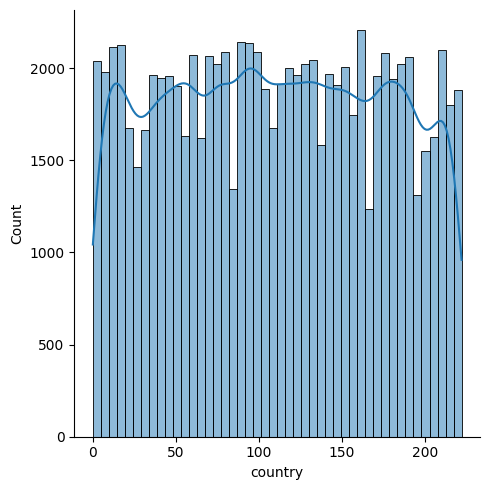

In [ ]:
sns.displot(cov19, x="country",kde=True)

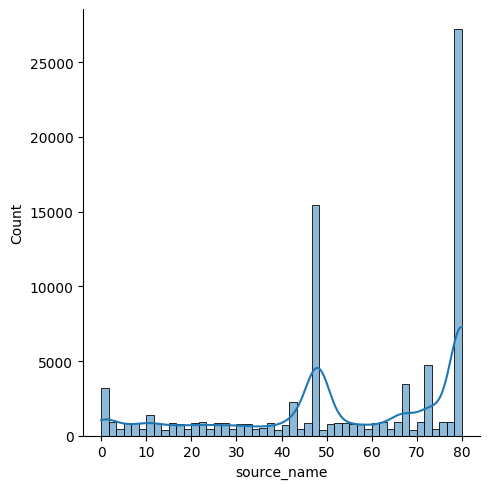

In [ ]:
sns.displot(cov19,x='source_name',kde=True)

<AxesSubplot: xlabel='iso_code', ylabel='country'>

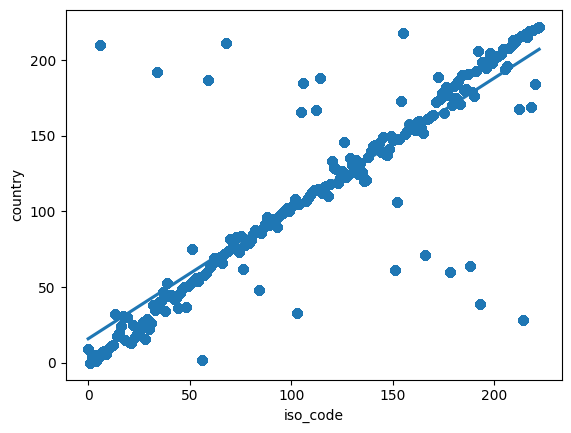

In [ ]:
sns.regplot(y="country",x='iso_code', data=cov19)

Test the model and show the metrics

In [ ]:
x=cov19[['country', 'iso_code','people_vaccinated',
       'people_fully_vaccinated','daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website']]
x

country  iso_code  people_vaccinated  people_fully_vaccinated  \
0            0         1       0.000000e+00             1.413830e+07   
1            0         1       1.770508e+07             1.413830e+07   
2            0         1       1.770508e+07             1.413830e+07   
3            0         1       1.770508e+07             1.413830e+07   
4            0         1       1.770508e+07             1.413830e+07   
...        ...       ...                ...                      ...   
86507      222       222       4.814582e+06             3.473523e+06   
86508      222       222       4.886242e+06             3.487962e+06   
86509      222       222       4.918147e+06             3.493763e+06   
86510      222       222       4.975433e+06             3.501493e+06   
86511      222       222       5.053114e+06             3.510256e+06   

       daily_vaccinations_raw  daily_vaccinations  \
0               270599.578248       131305.486075   
1               270599.578248         1367.000000   
2               270599.578248         1367.000000   
3               270599.578248         1367.000000   
4               270599.578248         1367.000000   
...                       ...                 ...   
86507           139213.000000        69579.000000   
86508           100086.000000        83429.000000   
86509            53311.000000        90629.000000   
86510            89321.000000       100614.000000   
86511           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

       vaccines  source_name  source_website  
0            36           80              21  
1            36           80              21  
2            36           80              21  
3            36           80              21  
4            36           80              21  
...         ...          ...             ...  
86507        72           48              94  
86508        72           48              94  
86509        72           48              94  
86510        72           48              94  
86511        72           48              94  

[86512 rows x 13 columns]

In [ ]:
y=cov19[['total_vaccinations']]
y

total_vaccinations
0            0.000000e+00
1            4.592964e+07
2            4.592964e+07
3            4.592964e+07
4            4.592964e+07
...                   ...
86507        8.691642e+06
86508        8.791728e+06
86509        8.845039e+06
86510        8.934360e+06
86511        9.039729e+06

[86512 rows x 1 columns]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [ ]:
x_train

country  iso_code  people_vaccinated  people_fully_vaccinated  \
19470       50        47       1.016790e+05             9.333300e+04   
39524      100        99       1.770508e+07             1.413830e+07   
64711      164       170       1.770508e+07             1.413830e+07   
14014       36        44       1.770508e+07             1.413830e+07   
71060      181       186       1.061970e+05             5.302100e+04   
...        ...       ...                ...                      ...   
6265        15        18       5.823245e+06             4.217719e+06   
54886      139       144       1.770508e+07             1.413830e+07   
76820      195       196       1.770508e+07             1.413830e+07   
860          2        56       1.770508e+07             1.413830e+07   
15795       41        36       1.770508e+07             1.413830e+07   

       daily_vaccinations_raw  daily_vaccinations  \
19470           270599.578248               175.0   
39524           270599.578248            343845.0   
64711           270599.578248              2180.0   
14014           270599.578248              3238.0   
71060             7011.000000              3922.0   
...                       ...                 ...   
6265              6462.000000              7042.0   
54886           270599.578248            119865.0   
76820           270599.578248             32187.0   
860             270599.578248             19709.0   
15795           270599.578248            883694.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
19470                      118.340000                      61.700000   
39524                       80.188543                      40.927317   
64711                       80.188543                      40.927317   
14014                       80.188543                      40.927317   
71060                        7.660000                       5.110000   
...                               ...                            ...   
6265                         6.040000                       3.500000   
54886                       80.188543                      40.927317   
76820                       80.188543                      40.927317   
860                         80.188543                      40.927317   
15795                       80.188543                      40.927317   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
19470                            56.640000                          1062.0   
39524                            35.523243                          2728.0   
64711                            35.523243                           164.0   
14014                            35.523243                          5763.0   
71060                             2.550000                          1887.0   
...                                    ...                             ...   
6265                              2.540000                            42.0   
54886                            35.523243                          6980.0   
76820                            35.523243                          3301.0   
860                              35.523243                           442.0   
15795                            35.523243                           612.0   

       vaccines  source_name  source_website  
19470        59           17               6  
39524        50           69             112  
64711        28           80               3  
14014        51           80              21  
71060        20           63              12  
...         ...          ...             ...  
6265         26            7               0  
54886        20            9              52  
76820        55           80              21  
860          72           80              21  
15795        10           60               2  

[64884 rows x 13 columns]

In [ ]:
x_test

country  iso_code  people_vaccinated  people_fully_vaccinated  \
49657      126       135       1.770508e+07             1.413830e+07   
43843      111       109       1.696621e+06             1.412128e+06   
84854      218       155       2.334512e+06             2.162418e+06   
28824       74        69       1.770508e+07             1.413830e+07   
11597       29        29       1.770508e+07             1.413830e+07   
...        ...       ...                ...                      ...   
32360       83        73       8.982700e+04             3.951800e+04   
63524      161       167       1.770508e+07             1.413830e+07   
77482      197       195       5.176355e+07             4.738626e+07   
53989      137       147       1.770508e+07             1.413830e+07   
16929       43        43       3.411020e+05             2.968590e+05   

       daily_vaccinations_raw  daily_vaccinations  \
49657           270599.578248             16401.0   
43843              433.000000             11804.0   
84854             6557.000000              6052.0   
28824           270599.578248              4638.0   
11597           270599.578248              3219.0   
...                       ...                 ...   
32360           270599.578248              2711.0   
63524            10592.000000              6235.0   
77482           570096.000000            451360.0   
53989           270599.578248               100.0   
16929           270599.578248                 0.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
49657                       80.188543                      40.927317   
43843                       45.930000                      25.060000   
84854                      141.860000                      73.640000   
28824                       80.188543                      40.927317   
11597                       80.188543                      40.927317   
...                               ...                            ...   
32360                        0.960000                       0.670000   
63524                      167.960000                      40.927317   
77482                      155.960000                      74.000000   
53989                       80.188543                      40.927317   
16929                       71.810000                      38.390000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
49657                            35.523243                         12879.0   
43843                            20.860000                          1744.0   
84854                            68.220000                          1909.0   
28824                            35.523243                          1165.0   
11597                            35.523243                          7291.0   
...                                    ...                             ...   
32360                             0.290000                           201.0   
63524                            35.523243                          2128.0   
77482                            67.740000                          6453.0   
53989                            35.523243                          9197.0   
16929                            33.410000                             0.0   

       vaccines  source_name  source_website  
49657        15           80               3  
43843        67           28              57  
84854        50           43              10  
28824        65           55              86  
11597        25           80              21  
...         ...          ...             ...  
32360        39           61              21  
63524        59           54              19  
77482        52           39              36  
53989        61           80              81  
16929        15           80              21  

[21628 rows x 13 columns]

In [ ]:
y_train

total_vaccinations
19470        1.950120e+05
39524        4.592964e+07
64711        4.592964e+07
14014        4.592964e+07
71060        1.591870e+05
...                   ...
6265         1.004096e+07
54886        4.592964e+07
76820        4.592964e+07
860          4.592964e+07
15795        4.592964e+07

[64884 rows x 1 columns]

In [ ]:
y_test

total_vaccinations
49657        4.592964e+07
43843        3.108749e+06
84854        4.496930e+06
28824        4.592964e+07
11597        4.592964e+07
...                   ...
32360        1.293450e+05
63524        4.922055e+06
77482        1.090945e+08
53989        4.592964e+07
16929        6.379610e+05

[21628 rows x 1 columns]

supervised lering algorithems

Liner Regression

In [ ]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
LR.intercept_

array([21109721.51640699])

In [ ]:
LR.intercept_

array([21109721.51640699])

In [ ]:
LR.coef_

array([[-9.95292165e+04,  3.88524670e+04, -4.03399494e-01,
         2.05743942e+00,  1.49319428e+01,  9.64803478e+01,
         2.05020848e+06, -2.52379242e+06, -2.07634562e+06,
        -1.57274596e+03,  4.14989406e+04,  2.12203101e+05,
        -6.91265397e+04]])

In [ ]:
coeffcients = pd.DataFrame([x_train.columns,LR.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute',1: 'Coefficients'})
coeffcients

Attribute  \
0                               country   
1                              iso_code   
2                     people_vaccinated   
3               people_fully_vaccinated   
4                daily_vaccinations_raw   
5                    daily_vaccinations   
6        total_vaccinations_per_hundred   
7         people_vaccinated_per_hundred   
8   people_fully_vaccinated_per_hundred   
9        daily_vaccinations_per_million   
10                             vaccines   
11                          source_name   
12                       source_website   

                                         Coefficients  
0   [-99529.21653150182, 38852.46701110535, -0.403...  
1                                                None  
2                                                None  
3                                                None  
4                                                None  
5                                                None  
6                                                None  
7                                                None  
8                                                None  
9                                                None  
10                                               None  
11                                               None  
12                                               None

In [ ]:
y_test

total_vaccinations
49657        4.592964e+07
43843        3.108749e+06
84854        4.496930e+06
28824        4.592964e+07
11597        4.592964e+07
...                   ...
32360        1.293450e+05
63524        4.922055e+06
77482        1.090945e+08
53989        4.592964e+07
16929        6.379610e+05

[21628 rows x 1 columns]

In [ ]:
y_pred_LR=LR.predict(x_test)
y_pred_LR

array([[ 2.58721562e+07],
       [ 7.30947046e+06],
       [-1.95281591e+07],
       ...,
       [ 1.27886280e+08],
       [ 2.59787701e+07],
       [ 2.01278151e+07]])

𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y.

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred_LR))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_LR))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_LR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)))

R^2: 0.6117337462998071
MAE: 26021756.07674878
MSE: 1.0588822188482832e+16
RMSE: 102902002.8399974


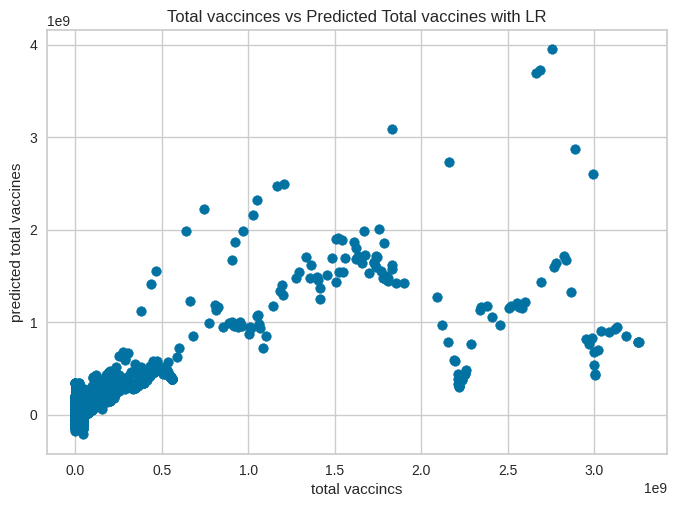

In [ ]:
plt.scatter(y_test,y_pred_LR)
plt.xlabel("total vaccincs")
plt.ylabel("predicted total vaccines")
plt.title("Total vaccinces vs Predicted Total vaccines with LR" )
plt.show()

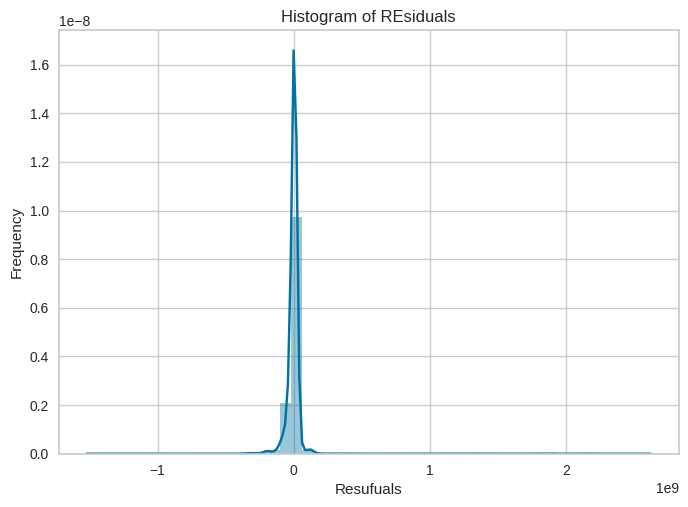

In [ ]:
sns.distplot(y_test-y_pred_LR)
plt.title("Histogram of REsiduals")
plt.xlabel("Resufuals")
plt.ylabel("Frequency")
plt.show()

Polynomial Regression

In [ ]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)

# transform the features to higher degree features.
x_train_quadratic = poly_features.fit_transform(x_train)

# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(x_train_quadratic, y_train)

# predicting on training data-set
y_train_predicted = quadratic.predict(x_train_quadratic)

# predicting on test data-set
y_test_predicted = quadratic.predict(poly_features.transform(x_test))

In [ ]:
metrics.r2_score(y_train,y_train_predicted)

0.9112865921750624

In [ ]:
metrics.r2_score(y_train,y_train_predicted)

0.9112865921750624

In [ ]:
metrics.r2_score(y_test,y_test_predicted)

0.8725618400424017

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predicted))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

MAE: 14349092.184167128
MSE: 3475501676899331.0
RMSE: 58953385.62711501


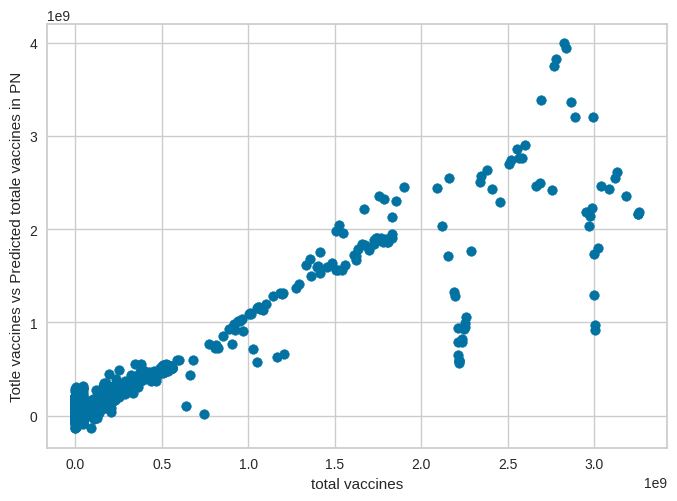

In [ ]:
plt.scatter(y_test,y_test_predicted)
plt.xlabel("total vaccines")
plt.ylabel("Totle vaccines vs Predicted totale vaccines in PN")
plt.show()

DecisiionTree

In [ ]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred_DT=regressor.predict(x_test)
y_pred_DT

array([4.59296446e+07, 3.10785000e+06, 4.50069200e+06, ...,
       1.08524424e+08, 4.59296446e+07, 6.37961000e+05])

In [ ]:
y_test

total_vaccinations
49657        4.592964e+07
43843        3.108749e+06
84854        4.496930e+06
28824        4.592964e+07
11597        4.592964e+07
...                   ...
32360        1.293450e+05
63524        4.922055e+06
77482        1.090945e+08
53989        4.592964e+07
16929        6.379610e+05

[21628 rows x 1 columns]

In [ ]:
print('R^2:',metrics.r2_score(y_test, y_pred_DT))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_DT))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_DT))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)))

R^2: 0.9481441092875095
MAE: 830482.3530989175
MSE: 1414217179440870.5
RMSE: 37606079.02242496


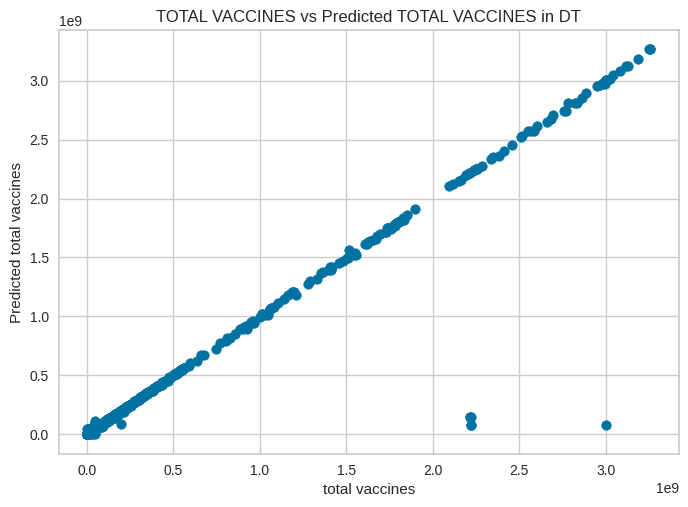

In [ ]:
plt.scatter(y_test, y_pred_DT)
plt.xlabel("total vaccines")
plt.ylabel("Predicted total vaccines")
plt.title("TOTAL VACCINES vs Predicted TOTAL VACCINES in DT")
plt.show()

XGboost

In [ ]:
reg_mod = xgb.XGBRegressor(n_estimators=1000,lerining_rate=0.08,subsample=0.75,colsample_bytree=1,max_depth=7,gamma=0,)
reg_mod.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, lerining_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
scores = cross_val_score(reg_mod, x_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.99


In [ ]:
reg_mod.fit(x_train,y_train)
predictions=reg_mod.predict(x_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 14521705.006916


In [ ]:
r2 = np.sqrt(r2_score(y_test,predictions))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.996126


unsupervised learning algorithems

k_means

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[3.3369655591680056e+20,
 1.0702640657423932e+20,
 6.120856708415019e+19,
 4.683307443542618e+19,
 3.448602467592527e+19,
 2.3923690329871438e+19,
 1.6623881507569947e+19,
 1.1999848027831042e+19,
 9.771749206099872e+18,
 7.712525554031773e+18]

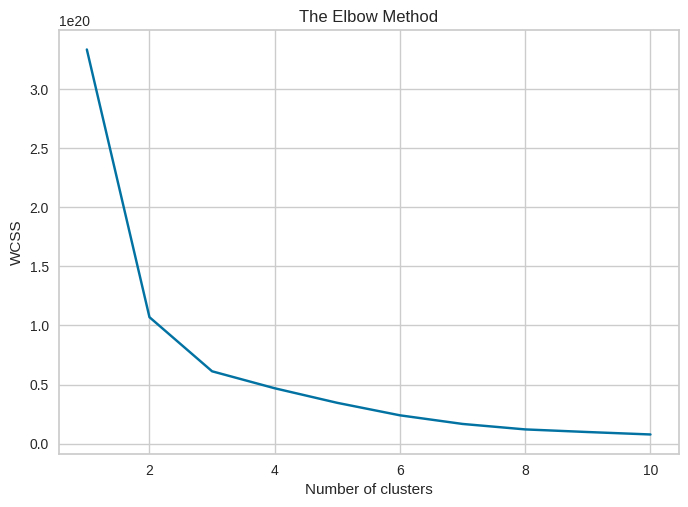

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
kmeans.cluster_centers_

array([[1.10130898e+02, 1.09386900e+02, 1.55397339e+07, 1.25354281e+07,
        2.55222546e+05, 1.15402014e+05, 8.01143131e+01, 4.08764356e+01,
        3.55044181e+01, 3.25446088e+03, 4.51280122e+01, 5.48849698e+01,
        4.30648870e+01],
       [8.45146444e+01, 8.21255230e+01, 7.99339853e+08, 5.92734771e+08,
        5.82132230e+06, 5.87205979e+06, 1.06983724e+02, 5.92943311e+01,
        4.23185073e+01, 4.19135146e+03, 1.52217573e+01, 2.77991632e+01,
        2.37573222e+01]])

save your final model

PyCaret's Regression module (pycaret.regression) is a supervised machine learning module which is used for predicting continuous values / outcomes using various techniques and algorithms. Regression can be used for predicting values / outcomes such as sales, units sold, temperature or any number which is continuous.

PyCaret's regression module has over 25 algorithms and 10 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's regression module has it all.

In [ ]:
dataset =pd.read_csv('/content/country_vaccinations.csv')

In [ ]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (77861, 15)
Unseen Data For Predictions: (8651, 15)


In [ ]:
dataset_fillna = dataset

In [ ]:
dataset_fillna.fillna(dataset_fillna.mean(), inplace=True)
# count the number of NaN values in each column
print(dataset_fillna.isnull().sum())

dataset_fillna

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64


country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22        0.000000e+00   
1      Afghanistan      AFG  2021-02-23        4.592964e+07   
2      Afghanistan      AFG  2021-02-24        4.592964e+07   
3      Afghanistan      AFG  2021-02-25        4.592964e+07   
4      Afghanistan      AFG  2021-02-26        4.592964e+07   
...            ...      ...         ...                 ...   
86507     Zimbabwe      ZWE  2022-03-25        8.691642e+06   
86508     Zimbabwe      ZWE  2022-03-26        8.791728e+06   
86509     Zimbabwe      ZWE  2022-03-27        8.845039e+06   
86510     Zimbabwe      ZWE  2022-03-28        8.934360e+06   
86511     Zimbabwe      ZWE  2022-03-29        9.039729e+06   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0           0.000000e+00             1.413830e+07           270599.578248   
1           1.770508e+07             1.413830e+07           270599.578248   
2           1.770508e+07             1.413830e+07           270599.578248   
3           1.770508e+07             1.413830e+07           270599.578248   
4           1.770508e+07             1.413830e+07           270599.578248   
...                  ...                      ...                     ...   
86507       4.814582e+06             3.473523e+06           139213.000000   
86508       4.886242e+06             3.487962e+06           100086.000000   
86509       4.918147e+06             3.493763e+06            53311.000000   
86510       4.975433e+06             3.501493e+06            89321.000000   
86511       5.053114e+06             3.510256e+06           105369.000000   

       daily_vaccinations  total_vaccinations_per_hundred  \
0           131305.486075                        0.000000   
1             1367.000000                       80.188543   
2             1367.000000                       80.188543   
3             1367.000000                       80.188543   
4             1367.000000                       80.188543   
...                   ...                             ...   
86507        69579.000000                       57.590000   
86508        83429.000000                       58.250000   
86509        90629.000000                       58.610000   
86510       100614.000000                       59.200000   
86511       103751.000000                       59.900000   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                           0.000000                            35.523243   
1                          40.927317                            35.523243   
2                          40.927317                            35.523243   
3                          40.927317                            35.523243   
4                          40.927317                            35.523243   
...                              ...                                  ...   
86507                      31.900000                            23.020000   
86508                      32.380000                            23.110000   
86509                      32.590000                            23.150000   
86510                      32.970000                            23.200000   
86511                      33.480000                            23.260000   

       daily_vaccinations_per_million  \
0                         3257.049157   
1                           34.000000   
2                           34.000000   
3                           34.000000   
4                           34.000000   
...                               ...   
86507                     4610.000000   
86508                     5528.000000   
86509                     6005.000000   
86510                     6667.000000   
86511                     6874.000000   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  

In [ ]:
le=LabelEncoder()
dataset["country"]=le.fit_transform(dataset["country"])
dataset

country iso_code        date  total_vaccinations  people_vaccinated  \
0            0      AFG  2021-02-22        0.000000e+00       0.000000e+00   
1            0      AFG  2021-02-23        4.592964e+07       1.770508e+07   
2            0      AFG  2021-02-24        4.592964e+07       1.770508e+07   
3            0      AFG  2021-02-25        4.592964e+07       1.770508e+07   
4            0      AFG  2021-02-26        4.592964e+07       1.770508e+07   
...        ...      ...         ...                 ...                ...   
86507      222      ZWE  2022-03-25        8.691642e+06       4.814582e+06   
86508      222      ZWE  2022-03-26        8.791728e+06       4.886242e+06   
86509      222      ZWE  2022-03-27        8.845039e+06       4.918147e+06   
86510      222      ZWE  2022-03-28        8.934360e+06       4.975433e+06   
86511      222      ZWE  2022-03-29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4      Johnson&Johnson, Oxford/

In [ ]:
le=LabelEncoder()
dataset['iso_code']=le.fit_transform(dataset['iso_code'])
dataset

country  iso_code        date  total_vaccinations  people_vaccinated  \
0            0         1  2021-02-22        0.000000e+00       0.000000e+00   
1            0         1  2021-02-23        4.592964e+07       1.770508e+07   
2            0         1  2021-02-24        4.592964e+07       1.770508e+07   
3            0         1  2021-02-25        4.592964e+07       1.770508e+07   
4            0         1  2021-02-26        4.592964e+07       1.770508e+07   
...        ...       ...         ...                 ...                ...   
86507      222       222  2022-03-25        8.691642e+06       4.814582e+06   
86508      222       222  2022-03-26        8.791728e+06       4.886242e+06   
86509      222       222  2022-03-27        8.845039e+06       4.918147e+06   
86510      222       222  2022-03-28        8.934360e+06       4.975433e+06   
86511      222       222  2022-03-29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4      Johnson&John

In [ ]:
le=LabelEncoder()
dataset['vaccines']=le.fit_transform(dataset['vaccines'])
dataset

country  iso_code        date  total_vaccinations  people_vaccinated  \
0            0         1  2021-02-22        0.000000e+00       0.000000e+00   
1            0         1  2021-02-23        4.592964e+07       1.770508e+07   
2            0         1  2021-02-24        4.592964e+07       1.770508e+07   
3            0         1  2021-02-25        4.592964e+07       1.770508e+07   
4            0         1  2021-02-26        4.592964e+07       1.770508e+07   
...        ...       ...         ...                 ...                ...   
86507      222       222  2022-03-25        8.691642e+06       4.814582e+06   
86508      222       222  2022-03-26        8.791728e+06       4.886242e+06   
86509      222       222  2022-03-27        8.845039e+06       4.918147e+06   
86510      222       222  2022-03-28        8.934360e+06       4.975433e+06   
86511      222       222  2022-03-29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

       vaccines                source_name  \
0            36  World Health Organization   
1            36  World Health Organization   
2            36  World Health Organization   
3            36  World Health Organization   
4            36  World Health Organization   
...         ...                        ... 

In [ ]:
le=LabelEncoder()
dataset['source_name']=le.fit_transform(dataset['source_name'])
dataset

country  iso_code        date  total_vaccinations  people_vaccinated  \
0            0         1  2021-02-22        0.000000e+00       0.000000e+00   
1            0         1  2021-02-23        4.592964e+07       1.770508e+07   
2            0         1  2021-02-24        4.592964e+07       1.770508e+07   
3            0         1  2021-02-25        4.592964e+07       1.770508e+07   
4            0         1  2021-02-26        4.592964e+07       1.770508e+07   
...        ...       ...         ...                 ...                ...   
86507      222       222  2022-03-25        8.691642e+06       4.814582e+06   
86508      222       222  2022-03-26        8.791728e+06       4.886242e+06   
86509      222       222  2022-03-27        8.845039e+06       4.918147e+06   
86510      222       222  2022-03-28        8.934360e+06       4.975433e+06   
86511      222       222  2022-03-29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

       vaccines  source_name  \
0            36           80   
1            36           80   
2            36           80   
3            36           80   
4            36           80   
...         ...          ...   
86507        72           48   
86508        72           48   
86509        72           48   

In [ ]:
le=LabelEncoder()
dataset['source_website']=le.fit_transform(dataset['source_website'])
dataset

country  iso_code        date  total_vaccinations  people_vaccinated  \
0            0         1  2021-02-22        0.000000e+00       0.000000e+00   
1            0         1  2021-02-23        4.592964e+07       1.770508e+07   
2            0         1  2021-02-24        4.592964e+07       1.770508e+07   
3            0         1  2021-02-25        4.592964e+07       1.770508e+07   
4            0         1  2021-02-26        4.592964e+07       1.770508e+07   
...        ...       ...         ...                 ...                ...   
86507      222       222  2022-03-25        8.691642e+06       4.814582e+06   
86508      222       222  2022-03-26        8.791728e+06       4.886242e+06   
86509      222       222  2022-03-27        8.845039e+06       4.918147e+06   
86510      222       222  2022-03-28        8.934360e+06       4.975433e+06   
86511      222       222  2022-03-29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

       vaccines  source_name  source_website  
0            36           80              21  
1            36           80              21  
2            36           80              21  
3            36           80              21  
4            36           80              21  
...         ...          ...         

In [ ]:
dataset['date'] = dataset['date'].str.replace('-', ' ')
dataset

country  iso_code        date  total_vaccinations  people_vaccinated  \
0            0         1  2021 02 22        0.000000e+00       0.000000e+00   
1            0         1  2021 02 23        4.592964e+07       1.770508e+07   
2            0         1  2021 02 24        4.592964e+07       1.770508e+07   
3            0         1  2021 02 25        4.592964e+07       1.770508e+07   
4            0         1  2021 02 26        4.592964e+07       1.770508e+07   
...        ...       ...         ...                 ...                ...   
86507      222       222  2022 03 25        8.691642e+06       4.814582e+06   
86508      222       222  2022 03 26        8.791728e+06       4.886242e+06   
86509      222       222  2022 03 27        8.845039e+06       4.918147e+06   
86510      222       222  2022 03 28        8.934360e+06       4.975433e+06   
86511      222       222  2022 03 29        9.039729e+06       5.053114e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 1.413830e+07           270599.578248       131305.486075   
1                 1.413830e+07           270599.578248         1367.000000   
2                 1.413830e+07           270599.578248         1367.000000   
3                 1.413830e+07           270599.578248         1367.000000   
4                 1.413830e+07           270599.578248         1367.000000   
...                        ...                     ...                 ...   
86507             3.473523e+06           139213.000000        69579.000000   
86508             3.487962e+06           100086.000000        83429.000000   
86509             3.493763e+06            53311.000000        90629.000000   
86510             3.501493e+06            89321.000000       100614.000000   
86511             3.510256e+06           105369.000000       103751.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           80.188543                      40.927317   
2                           80.188543                      40.927317   
3                           80.188543                      40.927317   
4                           80.188543                      40.927317   
...                               ...                            ...   
86507                       57.590000                      31.900000   
86508                       58.250000                      32.380000   
86509                       58.610000                      32.590000   
86510                       59.200000                      32.970000   
86511                       59.900000                      33.480000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                35.523243                     3257.049157   
1                                35.523243                       34.000000   
2                                35.523243                       34.000000   
3                                35.523243                       34.000000   
4                                35.523243                       34.000000   
...                                    ...                             ...   
86507                            23.020000                     4610.000000   
86508                            23.110000                     5528.000000   
86509                            23.150000                     6005.000000   
86510                            23.200000                     6667.000000   
86511                            23.260000                     6874.000000   

       vaccines  source_name  source_website  
0            36           80              21  
1            36           80              21  
2            36           80              21  
3            36           80              21  
4            36           80              21  
...         ...          ...         

a0 setting up Enviroment in pyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using the numeric_features and categorical_features parameters in setup().

In [ ]:
exp_reg = setup(data = dataset, target = 'total_vaccinations',session_id=123)

b0 comparing all Modles

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using kfold cross validation for metric evaluation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) of all the available models in the model library

In [ ]:
compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)

reate modle

In [116]:
et=create_model("et")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [117]:
xgboost=create_model("xgboost")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tuene a Modle

When a model is created using the create_model function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the tune_model function is used. This function automatically tunes the hyperparameters of a model using RandomGridSearch on a pre-defined search space. The output prints a scoring grid that shows MAE, MSE, RMSE, R2, RMSLE, and MAPE by fold. To use the custom search grid, you can pass custom_grid parameter in the tune_model function.

Residule plot

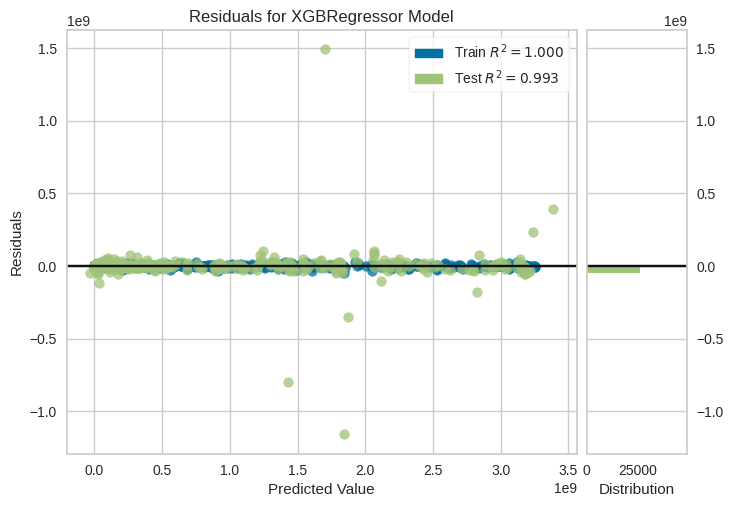

In [120]:
plot_model(xgboost)

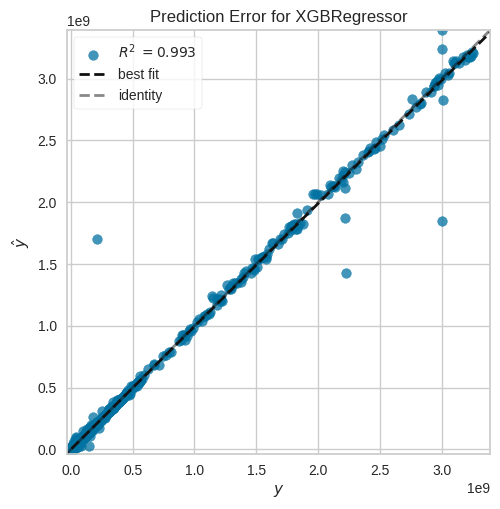

In [121]:
plot_model(xgboost,plot = "error")

Featue Importance Plot

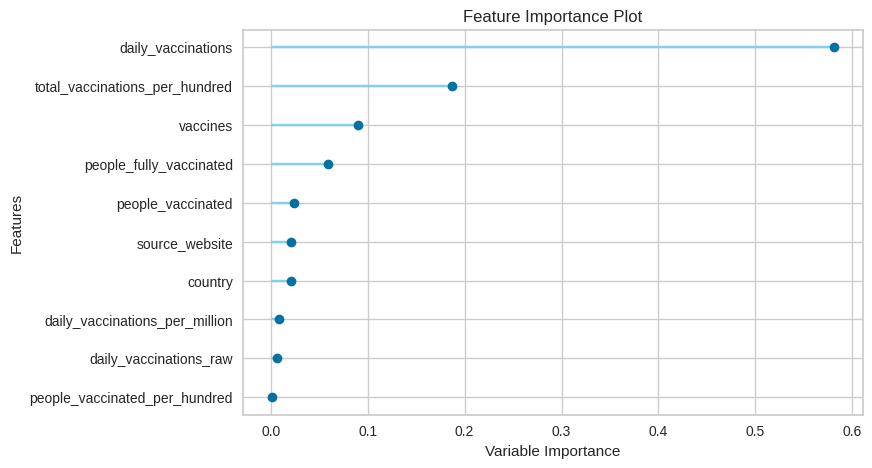

In [122]:
plot_model(xgboost, plot='feature')

In [124]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [125]:
save_model(xgboost,'cov19 Model 23Aug2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['country', 'iso_code',
                                              'people_vaccinated',
                                              'people_fully_vaccinated',
                                              'daily_vaccinations_raw',
                                              'daily_vaccinations',
                                              'total_vaccinations_per_hundred',
                                              'people_vaccinated_per_hundred',
                                              'people_fully_vaccinated_per_hundred',
                                              'daily_vaccinations_per_million',
                                              'vaccin...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=No

Sending the Result(Maketbkoone)

1- according to my alghoritm that i use them,xgboost alghoritm have a better parameter in compare with another alghoritm

2- in xgboost alghoritm daily_vaccinations is foremost feature

3- total_vaccinations have a linear behaviour with people_vaccinated_per_hundred,daily_vaccinations_per_million and etc.